In [1]:
# Importing all the necesary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import xgboost as xgb

In [2]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\mdnih\Downloads\Employee.csv",encoding='utf-8')

In [3]:
# Fetching first five rows in the dataset
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [5]:
# Finding the dependent and independent variables in the dataset
features = df.drop(columns=['LeaveOrNot'])  
target = df['LeaveOrNot']  

num_independent_vars = features.shape[1]
num_dependent_vars = 1  # Usually 1 if a single target

print(f"Number of independent variables: {num_independent_vars}")
print(f"Number of dependent variables: {num_dependent_vars}")

Number of independent variables: 8
Number of dependent variables: 1


<Axes: >

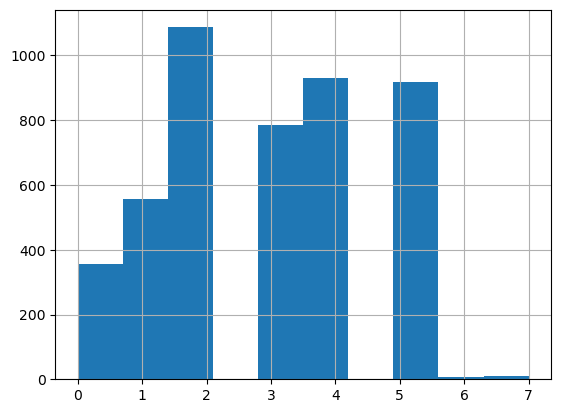

In [6]:
df['ExperienceInCurrentDomain'].hist()

In [7]:
# To find the total number of records in the dataset
# Checking count before cleaning the dataset
total_records = df.shape[0]
total_records

4653

In [8]:
# Finding datstypes of each column in the dataset
data_types = df.dtypes
print(data_types)

# For specific types in the dataset
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
categorical_cols = df.select_dtypes(include=['category', 'object']).columns
numerical_cols = df.select_dtypes(include=['number']).columns
textual_cols = df.select_dtypes(include=['object']).columns

print(f"Binary Columns: {binary_cols}")
print(f"Categorical Columns: {categorical_cols}")
print(f"Numerical Columns: {numerical_cols}")
print(f"Textual Columns: {textual_cols}")

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object
Binary Columns: ['Gender', 'EverBenched', 'LeaveOrNot']
Categorical Columns: Index(['Education', 'City', 'Gender', 'EverBenched'], dtype='object')
Numerical Columns: Index(['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain',
       'LeaveOrNot'],
      dtype='object')
Textual Columns: Index(['Education', 'City', 'Gender', 'EverBenched'], dtype='object')


In [9]:
# Finding summary of each variable in the dataset
summary_statistics = df.describe()
summary_statistics

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [10]:
# Check for missing values
missing_values = df.isnull().sum()

# Calculate the proportion of missing values
total_cells = np.product(df.shape)
total_missing = missing_values.sum()
proportion_missing = total_missing / total_cells

print(f"Number of missing values: {total_missing}")
print(f"Proportion of missing values: {proportion_missing:.2%}")

Number of missing values: 0
Proportion of missing values: 0.00%


In [11]:
#data cleaning
# Filling missing numerical values with the mean
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Filling missing categorical values with the mode
for column in df.select_dtypes(include=['object']).columns:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

# Remove duplicate rows
initial_row_count = len(df)
df.drop_duplicates(inplace=True)
removed_duplicates_count = initial_row_count - len(df)


print(f"Removed {removed_duplicates_count} duplicate rows.")

Removed 1889 duplicate rows.


In [12]:
# Checking count after cleaning the dataset
df.count()

Education                    2764
JoiningYear                  2764
City                         2764
PaymentTier                  2764
Age                          2764
Gender                       2764
EverBenched                  2764
ExperienceInCurrentDomain    2764
LeaveOrNot                   2764
dtype: int64

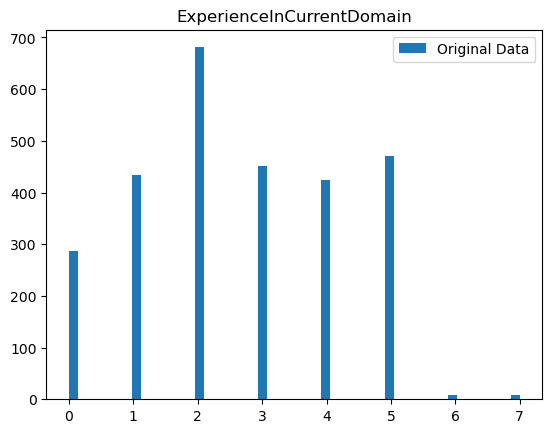

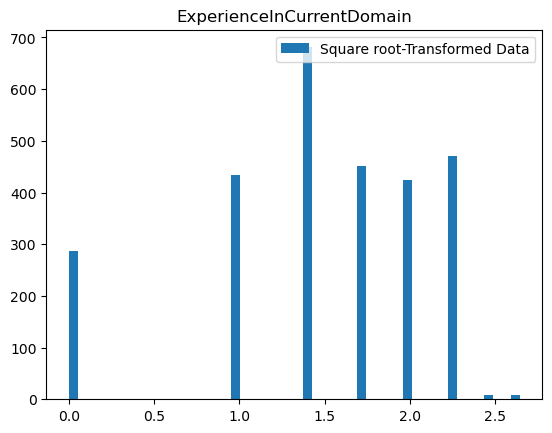

In [37]:
# Checking the data and transorming the data using sqrt-method

sqrt_data = np.sqrt(df['ExperienceInCurrentDomain'])

# Plotting the original data and the Square root-transformed data

plt.hist(df['ExperienceInCurrentDomain'], bins=50, label='Original Data')
plt.title('ExperienceInCurrentDomain')
plt.legend()
plt.show()
plt.hist(sqrt_data, bins=50, label='Square root-Transformed Data')
plt.title('ExperienceInCurrentDomain')
plt.legend()
plt.show()

In [15]:
#removing null values of City since it is a very minor percentage of the dataset
df_cleaned = df.dropna(subset=['City'])

In [16]:
df_cleaned.corr()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
JoiningYear,1.000000,-0.053823,0.024445,-0.031228,0.150650
PaymentTier,-0.053823,1.000000,0.067514,-0.004602,-0.119891
Age,0.024445,0.067514,1.000000,-0.053276,-0.114943
ExperienceInCurrentDomain,-0.031228,-0.004602,-0.053276,1.000000,-0.021181
LeaveOrNot,0.150650,-0.119891,-0.114943,-0.021181,1.000000


In [17]:
# Finding missing values in the dataset
df_cleaned.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [20]:
# Encode the 'Gender' column to numeric values: Male = 0, Female = 1
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Selecting relevant columns for PCA
features = ['Gender', 'Age', 'ExperienceInCurrentDomain', 'PaymentTier', 'LeaveOrNot', 'JoiningYear']
X = df[features]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performing PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Proportion of variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio_cumsum = explained_variance_ratio.cumsum()

explained_variance_ratio, explained_variance_ratio_cumsum

(array([0.23232987, 0.18082088, 0.16434205, 0.15781466, 0.1443968 ,
        0.12029574]),
 array([0.23232987, 0.41315075, 0.5774928 , 0.73530746, 0.87970426,
        1.        ]))

In [32]:
#Q1 and Q3  for Work Experience
Q1 = df['ExperienceInCurrentDomain'].quantile(0.25)
Q3 = df['ExperienceInCurrentDomain'].quantile(0.75)
IQR = Q3 - Q1

# upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# count of outliers
outliers_count = df[(df['ExperienceInCurrentDomain'] < lower_bound) | (df['ExperienceInCurrentDomain'] > upper_bound)].shape[0]
print(f"Number of outliers in 'ExperienceInCurrentDomain': {outliers_count}")

Number of outliers in 'ExperienceInCurrentDomain': 0


In [33]:
df['LeaveOrNot'].value_counts()

0    1676
1    1088
Name: LeaveOrNot, dtype: int64

### SVM using Sklearn

In [30]:

X = df.drop('LeaveOrNot', axis=1)  # Features
y = df['LeaveOrNot']  # Target

# Splitting data into 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define preprocessing for numeric and categorical data
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(gamma='auto'))
])

# Training
svm_pipeline.fit(X_train, y_train)
svm_predictions = svm_pipeline.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
report = classification_report(y_test, svm_predictions)


mse = mean_squared_error(y_test, svm_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, svm_predictions)
r2 = r2_score(y_test, svm_predictions)

#Scores
print(f"SVM Accuracy: {svm_accuracy}")
print(report)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")


SVM Accuracy: 0.7807228915662651
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       499
           1       0.83      0.57      0.68       331

    accuracy                           0.78       830
   macro avg       0.79      0.75      0.75       830
weighted avg       0.79      0.78      0.77       830

MSE: 0.21927710843373494
RMSE: 0.46827033691419634
MAE: 0.21927710843373494
R²: 0.08542159848397679


### Decision tree using Sklearn

In [31]:

X = df.drop('LeaveOrNot', axis=1)
y = df['LeaveOrNot']

# Splitting data into 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a pipeline for Decision Tree
tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Training
tree_pipeline.fit(X_train, y_train)
tree_predictions = tree_pipeline.predict(X_test)

# Calculations
tree_accuracy = accuracy_score(y_test, tree_predictions)
report = classification_report(y_test, tree_predictions)

mse = mean_squared_error(y_test, tree_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, tree_predictions)
r2 = r2_score(y_test, tree_predictions)
print(f"Decision Tree Accuracy: {tree_accuracy}")
print(report)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')


Decision Tree Accuracy: 0.6951807228915663
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       499
           1       0.62      0.60      0.61       331

    accuracy                           0.70       830
   macro avg       0.68      0.68      0.68       830
weighted avg       0.69      0.70      0.69       830

MSE: 0.30481927710843376
RMSE: 0.5521044077965994
MAE: 0.30481927710843376
R²: -0.271364481228318


### Decision tree using Xgboost

In [27]:
X = df.drop('LeaveOrNot', axis=1)
y = df['LeaveOrNot']

# Splitting data into 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# pipeline for XGBoost
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(random_state=42))
])

# Training
xgb_pipeline.fit(X_train, y_train)
xgb_predictions = xgb_pipeline.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_report = classification_report(y_test, xgb_predictions)

xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

# Calculations 
print(f"XGBoost Accuracy: {xgb_accuracy}")
print(xgb_report)

# Output results
print(f'MSE: {xgb_mse}')
print(f'RMSE: {xgb_rmse}')
print(f'MAE: {xgb_mae}')
print(f'R²: {xgb_r2}')

XGBoost Accuracy: 0.7590361445783133
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       499
           1       0.74      0.61      0.67       331

    accuracy                           0.76       830
   macro avg       0.75      0.73      0.74       830
weighted avg       0.76      0.76      0.75       830

MSE: 0.24096385542168675
RMSE: 0.490880693673816
MAE: 0.24096385542168675
R²: -0.005031210457168367


### SVM using LibSVM

In [29]:
X = df.drop('LeaveOrNot', axis=1)
y = df['LeaveOrNot']
# Splitting data into 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

#pipeline for SVM
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])

# Training
svm_pipeline.fit(X_train, y_train)
svm_predictions = svm_pipeline.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)
report = classification_report(y_test, svm_predictions)

# Calculations
mse = mean_squared_error(y_test, svm_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, svm_predictions)
r2 = r2_score(y_test, svm_predictions)

print(f"LibSVM (SVC) Accuracy: {svm_accuracy}")
print(report)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

LibSVM (SVC) Accuracy: 0.791566265060241
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       499
           1       0.85      0.58      0.69       331

    accuracy                           0.79       830
   macro avg       0.81      0.76      0.77       830
weighted avg       0.80      0.79      0.78       830

MSE: 0.20843373493975903
RMSE: 0.45654543578899026
MAE: 0.20843373493975903
R²: 0.13064800295454937
